<a href="https://colab.research.google.com/github/kari-hue/MachineLearningModels/blob/main/Fake_News_Detection/Fake_news_Detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Detecting Fake News using dataset from kaggle
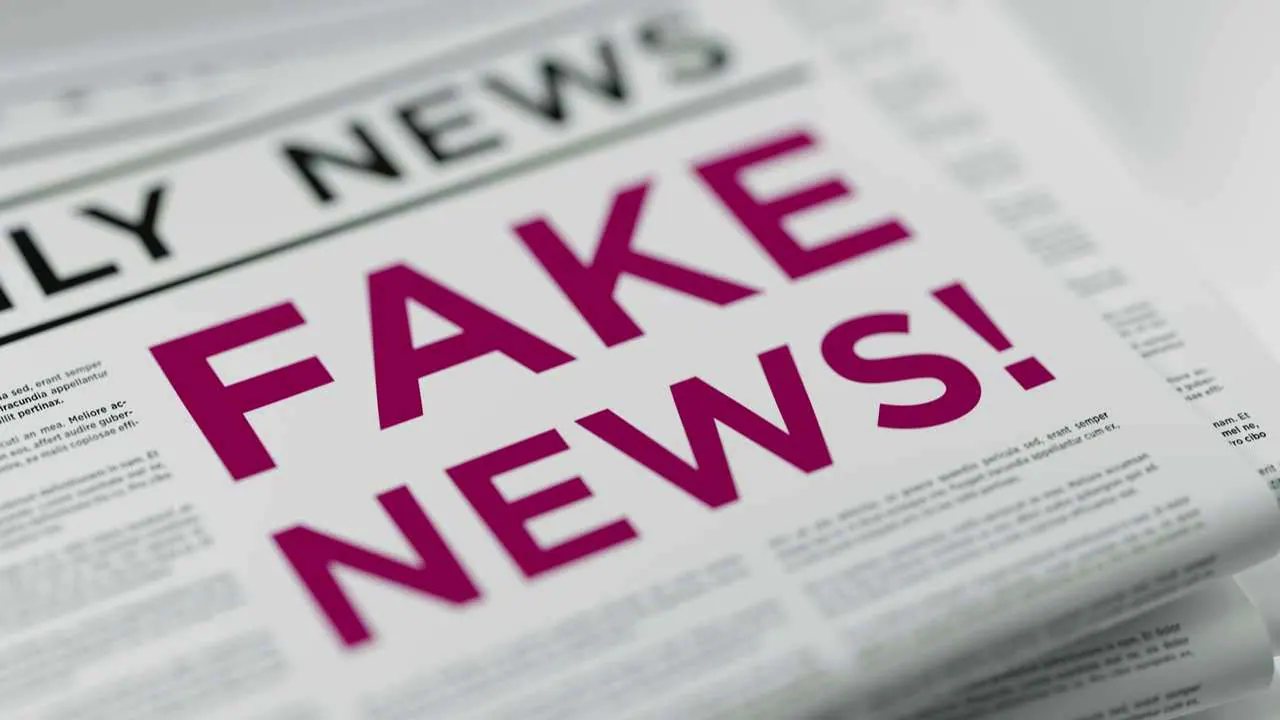

In [ ]:
## Importing library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

In [ ]:
## Reading from the dataset

fake_df= pd.read_csv("C:/Users/dell/Desktop/Fake_news/Fake.csv")
true_df= pd.read_csv("C:/Users/dell/Desktop/Fake_news/True.csv")

In [ ]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake_df['class'] = 0
true_df['class'] = 1

In [ ]:
fake_df.shape,true_df.shape


((23481, 5), (21417, 5))

In [ ]:
df_merge = pd.concat([fake_df,true_df],axis = 0)
df_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
## In the dataframe we are not using the Title,subject and date column so let's drop those olumns.

df = df_merge.drop(['title','subject','date'],axis = 1)
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
df = df.sample(frac = 1)
df.head()

,text,class
20705,Too bad for the gay pastor that Whole Foods ha...,0
204,By now it s common knowledge that Donald Trump...,0
22765,Fresh off its humiliating six-year-long debacl...,0
4526,While giving a speech at a church rally in Cle...,0
9401,From the Washington Examiner Roy Moore is th...,0


In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
## Let's create a function that is used to remove all the unnecessary character in ou rtext


def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w','',text)
    return text

    

In [ ]:
df['text'] = df['text'].apply(word_drop)

In [ ]:
df.head(10)

,text,class
20705,too bad for the gay pastor that whole foods ha...,0
204,by now it s common knowledge that donald trump...,0
22765,fresh off its humiliating six year long debacl...,0
4526,while giving a speech at a church rally in cle...,0
9401,from the washington examiner roy moore is th...,0
10741,charleston s c reuters as the presidenti...,1
15815,there s just something about shrillary that al...,0
21152,washington reuters u s president donald t...,1
23304,daily shooter t century wirethe dallas sniper ...,0
8819,instead of respectfully attending president ob...,0


In [ ]:
## Let's create x and y

x = df['text']
y = df['class']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33673,), (33673,), (11225,), (11225,))

In [ ]:
## Vectorizing the text -- Bag of words, or Tfidvectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline



In [ ]:
vectorization = TfidfVectorizer(binary=True, use_idf=True)
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### The reason behind using fit_transform with train dataset and only transform with the test data set?

When you do fit_transform, you teach your model the vectors with fit. The model learns the vectors to which they are used to transform data. You use the train data to learn the vectors, then you apply them to both train and test with transform

If you do a fit_transform on test data, you replaced the vectors learned in training data and replaced them with test data. Given that your test data is smaller than your train data, it is likely you would get two different vectorisation.

In [ ]:
xv_train.shape,y_train.shape,xv_test.shape,y_test.shape

((33673, 99893), (33673,), (11225, 99893), (11225,))

In [ ]:
## Using logistic regression for classification

from sklearn.linear_model import LogisticRegression



In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
xv_train

<33673x99893 sparse matrix of type '<class 'numpy.float64'>'
	with 6926853 stored elements in Compressed Sparse Row format>

In [ ]:
xv_train.shape,y_train.shape,xv_test.shape,y_test.shape

((33673, 99893), (33673,), (11225, 99893), (11225,))

In [ ]:
LR.score(xv_test,y_test)

0.9918040089086859

In [ ]:
pred_LR = LR.predict(xv_test)
print(classification_report(y_test,pred_LR))

### Using Decision Tree for making the prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(xv_test,y_test)

0.9955456570155902

In [ ]:
pred_DT = DT.predict(xv_test)
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5898
           1       1.00      0.99      1.00      5327

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:
## Making the confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,pred_DT)
print(cm)
accuracy_score(y_test,pred_DT)

[[5876   22]
 [  28 5299]]


0.9955456570155902

In [ ]:
##Let's show it in a heatmap

import seaborn as sns

<AxesSubplot:>

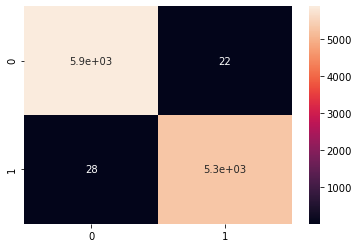

In [ ]:
sns.heatmap(cm, annot=True)


### Let's Do some Manual Testing

In [ ]:
def output_labels(n):
    if n == 0:
        return "This is a Fake News"
    elif n == 1:
        return "This is a Genuine News"


    
def manual_testing(news):
    testing_news = {"text" : [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    LR_pred = LR.predict(new_xv_test)
    DT_pred = DT.predict(new_xv_test)
    
    return print(" \n\n LR prediction: {} \n DT Prediction : {}".format(output_labels(LR_pred)))
    

In [ ]:
news = str(input())
manual_testing(news)